In [1]:
from skimage.io import imread
import matplotlib.pyplot as plt
import os
import h5py
import numpy as np
import scipy.signal as ss

In [4]:
img_t = '/Volumes/genie/Jihong_GENIE_stuff/PatcherBot/raw/2022.10.12_000/plate_002/patch_attempt_0032_000/patch_image_000.tif'
img_t = imread(img_t)
img_f = '/Volumes/genie/Jihong_GENIE_stuff/PatcherBot/raw/2022.10.12_000/plate_002/patch_attempt_0032_000/fluor_image_000.tif'
img_f = imread(img_f)

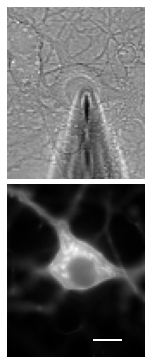

In [5]:
plt.figure(figsize=[2.5,5])
img_t_c = img_t[206:306,216:296]
ax1 = plt.subplot(211)
ax1.imshow(img_t_c,cmap='gray')
ax1.axis('off')

img_f_c = img_f[206:306,216:296]
ax2 = plt.subplot(212)
ax2.imshow(img_f_c,cmap='gray')
ax2.axis('off')
ax2.plot([50,65.385],[90,90],color='w',lw=2) #15.385 pixels for 10 nm

plt.tight_layout(pad=0.5)
plt.savefig('/Volumes/genie/Presentations/Jeremy/Sfn_poster_2022/EPS/cell_img.eps',format='eps')
plt.show()

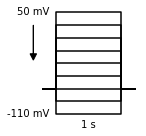

In [6]:
plt.figure(figsize=[2.5,2])
i=0
x = [0.3,0.5,0.5,1.5,1.5,1.7]
ax = plt.subplot(111)
for t in range(9):
    y = [-70,-70,50-i,50-i,-70,-70]
    ax.plot(x,y,color='k')
    i+=20
    ax.axis('off')
ax.text(-0.1,47,'50 mV')
ax.text(-0.25,-113,'-110 mV')
ax.text(1,-130,'1 s',ha='center')
ax.arrow(0.15,30,0,-45,head_width=0.1,head_length=10,color='k')
plt.tight_layout()
plt.savefig('/Volumes/genie/Presentations/Jeremy/Sfn_poster_2022/EPS/V_step.eps',format='eps')
plt.show()

In [7]:
dataPath = '/Volumes/genie/BenArthur/patch-screen/bot/2022.10.12_000/plate_002/patch_attempt_0034_000'

In [8]:
matFile = os.path.join(dataPath,'999.mat')

In [11]:
data = h5py.File(matFile)

In [12]:
d = data['params']['fit']
st = d[0]
obj = data[st]
dFF = obj['bleach_bkg_norm_ave_trace'][()]
dFF

array([ 0.00217788, -0.00073209,  0.00106997, ..., -0.00068652,
       -0.00325182, -0.00086034])

In [13]:
dFF.shape

(1980,)

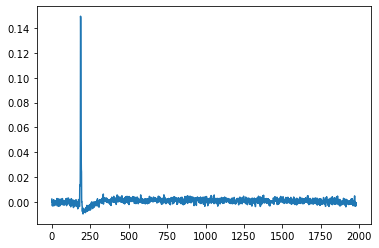

In [14]:
plt.plot(dFF)
plt.show()

In [15]:
daqFile = dataPath + '/I_clamp1_000/999/Camera/daqResult.ma'
daqData = h5py.File(daqFile,'r')['data']

clampFile = dataPath + '/I_clamp1_000/999/Clamp1.ma'
clampData = h5py.File(clampFile,'r')['data']

(10.0, 15.0)

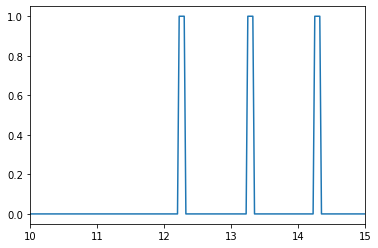

In [16]:
x = np.arange(daqData[0,:].shape[0])/40.0
plt.plot(x,daqData[0,:])
plt.xlim([10,15])

In [17]:
# daqData.shape
# clampData.shape

(10.0, 15.0)

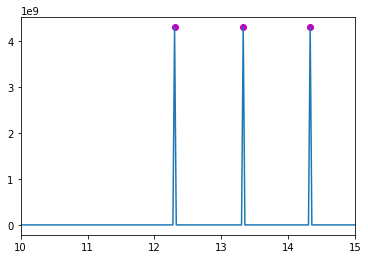

In [18]:
x = np.arange(daqData[0,:].shape[0]-1)/40.0
camSync = np.diff(daqData[0,:])
plt.plot(x,camSync)

p,_ = ss.find_peaks(camSync,height=3e9)
plt.scatter(p/40.0,camSync[p],color='m')
plt.xlim([10,15])


In [19]:
p.shape

(1962,)

In [20]:
x

array([0.000000e+00, 2.500000e-02, 5.000000e-02, ..., 1.999900e+03,
       1.999925e+03, 1.999950e+03])

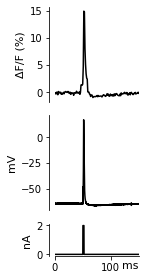

In [23]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1, gridspec_kw={'height_ratios': [3, 3, 1]})
f.set_size_inches(2.3,4)
x1 = p/40.0
ax1.plot(x1,dFF[:p.shape[0]]*100,color='k')
ax1.set_xlim([150,300])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.axes.get_xaxis().set_visible(False)
ax1.set_ylabel('\u0394F/F (%)',size=11)
ax1.spines['left'].set_position(('data', 140))

x2 = np.arange(clampData[0,:].shape[0])/40.0
ax2.plot(x2,clampData[0,:]*1e3,color='k')
ax2.set_xlim([150,300])
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.axes.get_xaxis().set_visible(False)
ax2.set_ylabel('mV',size=11)
ax2.spines['left'].set_position(('data', 140))

x3 = np.arange(clampData[2,:].shape[0])/40.0
ax3.plot(x3-150,clampData[2,:]*1e9,color='k')
ax3.set_xlim([0,150])
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.set_xlabel('ms',size=11)
ax3.set_ylabel('nA',size=11)
ax3.xaxis.set_label_coords(0.9, -0.15)
ax3.spines['left'].set_position(('data', -10))

f.tight_layout()
f.savefig('/Volumes/genie/Presentations/Jeremy/Sfn_poster_2022/EPS/I-clamp_example.eps',format='eps')